In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta

df = pd.read_csv('data/matches.csv')

In [2]:
def player_rating(player):
    player_df = df[(df['w1'] == player) | (df['w2'] == player) | (df['w3'] == player) | (df['w4'] == player) | 
            (df['l1'] == player) | (df['l2'] == player) | (df['l3'] == player) | (df['l4'] == player)].copy()
    def player_rating(row, player):
        if row['w1'] == player:
            return row['w1_nr']
        if row['w2'] == player:
            return row['w2_nr']
        if row['w3'] == player:
            return row['w3_nr']
        if row['w4'] == player:
            return row['w4_nr']
        if row['l1'] == player:
            return row['l1_nr']
        if row['l2'] == player:
            return row['l2_nr']
        if row['l3'] == player:
            return row['l3_nr']
        if row['l4'] == player:
            return row['l4_nr']
    player_df['player_rating'] = player_df.apply(player_rating, player=player, axis=1)
    return player_df.sort_values(by='date')


In [3]:
player = 'Thiru'
player_df = player_rating(player)

In [4]:
date_skeleton = pd.DataFrame(pd.date_range(min(player_df['date']), max(player_df['date']), freq='d'), columns=['date'])

In [5]:
date_skeleton['date'] = date_skeleton['date'].astype('str')

In [6]:
date_skeleton.merge(player_df, on='date', how='left').tail(20)

,date,match_id,year_month,map,w1,w2,w3,w4,l1,l2,...,l1_or,l2_or,l3_or,l4_or,l1_nr,l2_nr,l3_nr,l4_nr,map_only,player_rating
1466,2024-10-22,1050018.0,2024-10,4 Lakes (Random civs),JayMystic,Livi,Ju$TK!Dd!nG,Aragornn,Thiru,MODI,...,1843.0,1317.0,1308.0,510.0,1825.0,1299.0,1290.0,492.0,4 Lakes,1825.0
1467,2024-10-23,1050675.0,2024-10,Beduoins (Random civs),OS,Thiru,Livi,TRush,RedViper,Plan B,...,1840.0,1622.0,1320.0,604.0,1822.0,1604.0,1302.0,586.0,Beduoins,1750.0
1468,2024-10-23,1050698.0,2024-10,Runestones (Random civs),addu,MODI,Livi,FraGStaR,JayMystic,Thiru,...,2019.0,1750.0,1153.0,1008.0,1997.0,1728.0,1131.0,986.0,Runestones,1728.0
1469,2024-10-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1470,2024-10-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1471,2024-10-26,1052648.0,2024-10,Valley,Water,Thiru,noobnoob,Garam Aadmi,RedViper,MrWrong,...,1766.0,1483.0,1474.0,1435.0,1752.0,1469.0,1460.0,1421.0,Valley,1742.0
1472,2024-10-27,1054018.0,2024-10,Kawasan (Random civs),Morty,Shadeslayer II,adirath,Garam Aadmi,Thiru,Deadkorpse,...,1756.0,1614.0,756.0,590.0,1737.0,1595.0,737.0,571.0,Kawasan,1737.0
1473,2024-10-27,1053950.0,2024-10,Land Madness,Morty,Delusion9,newisyou,adirath,Thiru,Deadkorpse,...,1761.0,1619.0,1012.0,595.0,1727.0,1585.0,978.0,561.0,Land Madness,1727.0
1474,2024-10-27,1053868.0,2024-10,4 Lakes (Random civs),Thiru,Livi,ForeRuthless,Ju$TK!Dd!nG,Deadkorpse,Plan B,...,1681.0,1592.0,1290.0,701.0,1662.0,1573.0,1271.0,682.0,4 Lakes,1761.0
1475,2024-10-27,1053980.0,2024-10,Migration (Random civs),Thiru,Deadkorpse,newisyou,FraGStaR,Morty,Delusion9,...,2334.0,1179.0,694.0,524.0,2305.0,1150.0,665.0,495.0,Migration,1756.0


In [7]:
plot_df = date_skeleton.merge(player_df, on='date', how='left')

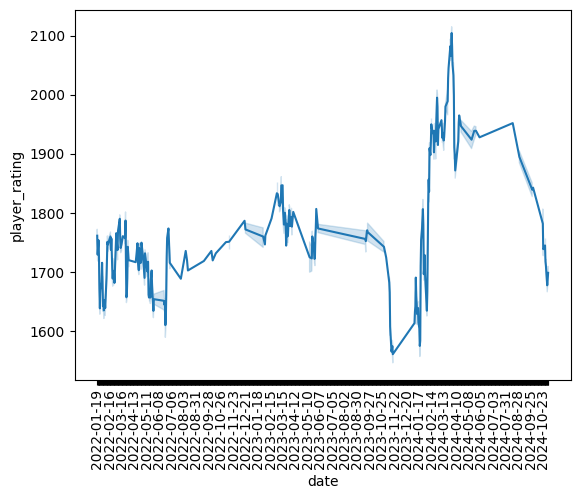

In [8]:
plot = sns.lineplot(data=plot_df, x='date', y='player_rating')
for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 28 == 0:  # every Nth label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.xticks(rotation=90);

In [9]:
def avg_rating(player):
    player_df = df[(df['w1'] == player) | (df['w2'] == player) | (df['w3'] == player) | (df['w4'] == player) | 
            (df['l1'] == player) | (df['l2'] == player) | (df['l3'] == player) | (df['l4'] == player)]
    # player_df = player_df[player_df['date'] >= '2023-10-01']
    
    def get_player_rating(row, player):
        if row['w1'] == player:
            return row['w1_nr']
        if row['w2'] == player:
            return row['w2_nr']
        if row['w3'] == player:
            return row['w3_nr']
        if row['w4'] == player:
            return row['w4_nr']
        if row['l1'] == player:
            return row['l1_nr']
        if row['l2'] == player:
            return row['l2_nr']
        if row['l3'] == player:
            return row['l3_nr']
        if row['l4'] == player:
            return row['l4_nr']
    return round(player_df.apply(get_player_rating, player=player, axis=1).mean(), 1)
 

In [10]:
avg_rating('AgentP')

nan